# Mobile Price Prediction Using Machine Learning

## Importing All The Required Packages

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")
print(sklearn.__version__)

1.2.2


## Data Cleaning

In [3]:
try:
    data = pd.read_csv("final.csv")
except:
    data_dir = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..', r'data\final.csv'))
    data = pd.read_csv(data_dir)
data.head()

,price,rating,sim_count,fast_charge,card,card_size,display_inches,displaypx_w,displaypx_h,refresh_rate,...,rear_cam_1,rear_cam_2,rear_cam_3,3g,4g,5g,rom,ram,battery,os
0,182999,78.0,2,NaN,0.0,0,6.7,1290.0,2796.0,120.0,...,48.0,12,12,1.0,1.0,1.0,1.0,6.0,4323.0,1
1,179900,86.0,2,NaN,0.0,0,6.7,1284.0,2778.0,120.0,...,12.0,12,12,1.0,1.0,1.0,1.0,6.0,4352.0,1
2,172999,77.0,2,NaN,0.0,0,6.1,1179.0,2556.0,120.0,...,48.0,12,12,1.0,1.0,1.0,1.0,6.0,3200.0,1
3,169900,78.0,2,NaN,0.0,0,6.7,1290.0,2796.0,120.0,...,48.0,12,12,1.0,1.0,1.0,512.0,6.0,4323.0,1
4,169000,NaN,2,55.0,NaN,0,8.0,2200.0,2480.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,512.0,8.0,4500.0,0


In [4]:
data.describe()

,price,rating,sim_count,fast_charge,card,card_size,display_inches,displaypx_w,displaypx_h,refresh_rate,...,front_cam_1,front_cam_2,rear_cam_1,3g,4g,5g,rom,ram,battery,os
count,1015.000000,876.000000,1015.000000,766.000000,736.000000,1015.000000,982.000000,982.000000,982.000000,610.000000,...,939.000000,19.000000,953.000000,995.0,994.0,547.0,995.000000,1008.000000,982.000000,1015.000000
mean,29767.708374,78.262557,1.978325,46.136684,0.851902,356.059113,6.469786,1059.559063,2178.586558,111.624590,...,16.548562,10.631579,49.964323,1.0,1.0,1.0,134.855276,21.099702,4760.328921,0.046305
std,29309.999090,7.387218,0.152310,34.327713,0.355438,438.918498,0.652008,308.276138,574.056686,18.542944,...,10.949822,7.889589,33.562025,0.0,0.0,0.0,87.895294,131.023596,1099.937903,0.210249
min,99.000000,60.000000,0.000000,10.000000,0.000000,0.000000,1.770000,120.000000,160.000000,90.000000,...,0.300000,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,800.000000,0.000000
25%,12377.000000,74.000000,2.000000,18.000000,1.000000,0.000000,6.500000,1080.000000,1612.000000,90.000000,...,8.000000,8.000000,16.000000,1.0,1.0,1.0,64.000000,4.000000,4500.000000,0.000000
50%,19499.000000,80.000000,2.000000,33.000000,1.000000,16.000000,6.580000,1080.000000,2400.000000,120.000000,...,16.000000,8.000000,50.000000,1.0,1.0,1.0,128.000000,6.000000,5000.000000,0.000000
75%,34990.000000,84.000000,2.000000,66.000000,1.000000,1000.000000,6.670000,1080.000000,2408.000000,120.000000,...,16.000000,8.000000,64.000000,1.0,1.0,1.0,128.000000,8.000000,5000.000000,0.000000
max,182999.000000,89.000000,2.000000,240.000000,1.000000,2000.000000,8.030000,2460.000000,3840.000000,240.000000,...,60.000000,32.000000,200.000000,1.0,1.0,1.0,640.000000,1800.000000,22000.000000,1.000000


In [5]:
# number of null values in each column
data.isna().sum()

price               0
rating            139
sim_count           0
fast_charge       249
card              279
card_size           0
display_inches     33
displaypx_w        33
displaypx_h        33
refresh_rate      405
core               61
clock_speed        76
front_cam_1        76
front_cam_2       996
rear_cam_1         62
rear_cam_2        316
rear_cam_3        507
3g                 20
4g                 21
5g                468
rom                20
ram                 7
battery            33
os                  0
dtype: int64

In [6]:
data.drop(["fast_charge","card","card_size","refresh_rate","displaypx_h","displaypx_w","rear_cam_2","rear_cam_3",'front_cam_2',"rating"],axis=1,inplace=True)

In [7]:
data.loc[data.rom.isna()]

,price,sim_count,display_inches,core,clock_speed,front_cam_1,rear_cam_1,3g,4g,5g,rom,ram,battery,os
161,49990,2,NaN,6.0,3.22,NaN,NaN,1.0,1.0,1.0,NaN,64.0,NaN,1
187,43900,2,NaN,6.0,3.22,NaN,NaN,1.0,1.0,1.0,NaN,64.0,NaN,1
783,11999,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1470.0,NaN,0
974,4799,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
977,4649,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
980,3999,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1200.0,NaN,0
983,3749,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
986,3399,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0
991,2799,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,0
992,2499,2,2.4,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,4.0,1020.0,0


In [8]:
# we can drop these rows where rom is null because most of the other attributes in these rows are also null
data.drop(data.loc[data.rom.isna()].index,axis=0,inplace=True)

In [9]:
data.sim_count.value_counts(dropna=False)

sim_count
2    977
1     17
0      1
Name: count, dtype: int64

In [10]:
# filling null values with mean values where number of null values is very low
data.display_inches.fillna(data.display_inches.mean(),inplace=True)
data.clock_speed.fillna(data.clock_speed.mean(),inplace=True)
data.core.fillna(data.core.mean(),inplace=True)
data.battery.fillna(data.battery.mean(),inplace=True)

# we can fill the null values in 4g and 5g columns with zero assuming its a 3g phone and we can drop the 3g column
data["4g"].fillna(0,inplace=True)
data["5g"].fillna(0,inplace=True)
data.drop(["3g"],axis=1,inplace=True)

In [11]:
data.loc[data["front_cam_1"].isna()]

,price,sim_count,display_inches,core,clock_speed,front_cam_1,rear_cam_1,4g,5g,rom,ram,battery,os
4,169000,2,8.000000,8.000000,2.860000,NaN,NaN,1.0,1.0,512.0,8.0,4500.000000,0
5,163980,2,7.600000,8.000000,3.200000,NaN,NaN,1.0,1.0,1.0,12.0,4400.000000,0
6,162990,2,7.800000,8.000000,2.840000,NaN,NaN,1.0,0.0,512.0,8.0,4600.000000,0
7,154998,2,7.600000,8.000000,3.200000,NaN,NaN,1.0,1.0,256.0,12.0,4400.000000,0
8,149999,2,7.200000,8.000000,2.840000,NaN,NaN,1.0,1.0,128.0,8.0,3360.000000,0
13,139900,2,6.473935,6.000000,3.100000,NaN,NaN,1.0,1.0,512.0,6.0,4764.141692,1
16,134999,1,7.400000,8.000000,2.840000,NaN,NaN,1.0,0.0,256.0,8.0,4000.000000,0
17,130990,2,6.473935,7.771008,2.441377,NaN,NaN,1.0,1.0,128.0,8.0,4764.141692,1
25,119990,2,8.030000,8.000000,3.200000,NaN,NaN,1.0,1.0,256.0,12.0,4800.000000,0
27,119900,2,6.473935,6.000000,3.100000,NaN,NaN,1.0,1.0,256.0,6.0,4764.141692,1


In [12]:
# from the above cell we can see that rows which has null for front camera also have null for rear camera ,
# so we can drop those rows because they are invalid data
data.drop(data.loc[data["front_cam_1"].isna()].index,axis=0,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 996
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           939 non-null    int64  
 1   sim_count       939 non-null    int64  
 2   display_inches  939 non-null    float64
 3   core            939 non-null    float64
 4   clock_speed     939 non-null    float64
 5   front_cam_1     939 non-null    float64
 6   rear_cam_1      939 non-null    float64
 7   4g              939 non-null    float64
 8   5g              939 non-null    float64
 9   rom             939 non-null    float64
 10  ram             939 non-null    float64
 11  battery         939 non-null    float64
 12  os              939 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 102.7 KB


In [14]:
data.isna().sum()

price             0
sim_count         0
display_inches    0
core              0
clock_speed       0
front_cam_1       0
rear_cam_1        0
4g                0
5g                0
rom               0
ram               0
battery           0
os                0
dtype: int64

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,939.0,28283.890309,25757.370348,1999.0,12990.00,19650.00,32990.00,182999.00
sim_count,939.0,1.989350,0.102701,1.0,2.00,2.00,2.00,2.00
display_inches,939.0,6.521278,0.314913,2.4,6.50,6.57,6.67,7.00
core,939.0,7.802210,0.786735,2.0,8.00,8.00,8.00,8.00
clock_speed,939.0,2.404726,0.446378,1.0,2.05,2.36,2.80,3.22
front_cam_1,939.0,16.548562,10.949822,0.3,8.00,16.00,16.00,60.00
rear_cam_1,939.0,50.700639,33.260610,2.0,48.00,50.00,64.00,200.00
4g,939.0,0.998935,0.032634,0.0,1.00,1.00,1.00,1.00
5g,939.0,0.547391,0.498014,0.0,0.00,1.00,1.00,1.00
rom,939.0,131.007455,79.809414,1.0,64.00,128.00,128.00,512.00


<Axes: xlabel='price'>

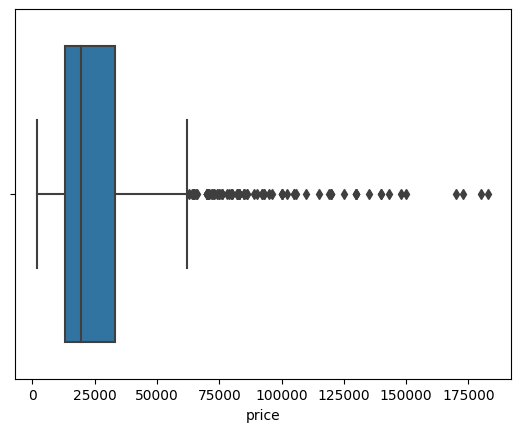

In [16]:
sns.boxplot(x="price",data=data)

## Exploratory Data Analysis

<Axes: >

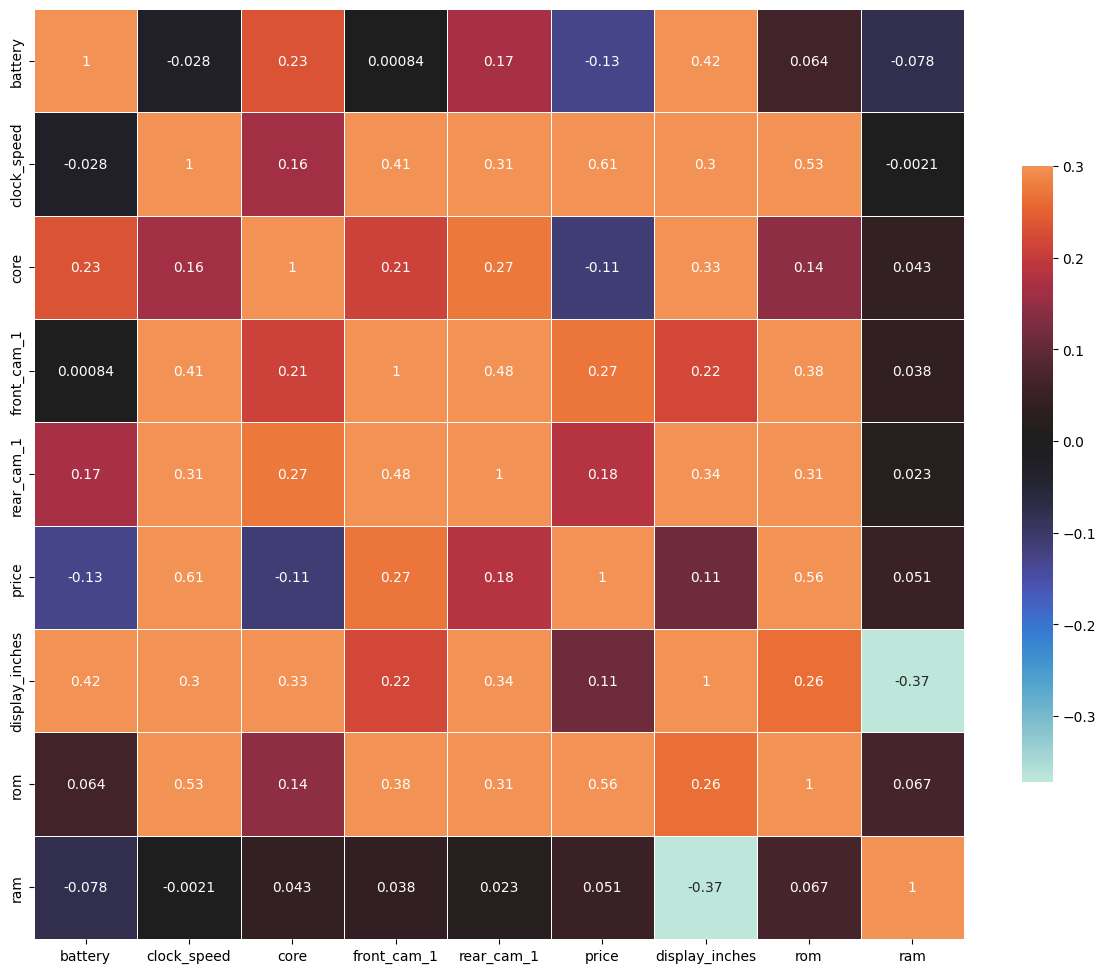

In [17]:
# heatmap of the correlation between variables
new_data = data[["battery","clock_speed","core","front_cam_1","rear_cam_1","price","display_inches","rom","ram"]]
plt.figure(figsize=(15, 16))
corr = new_data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

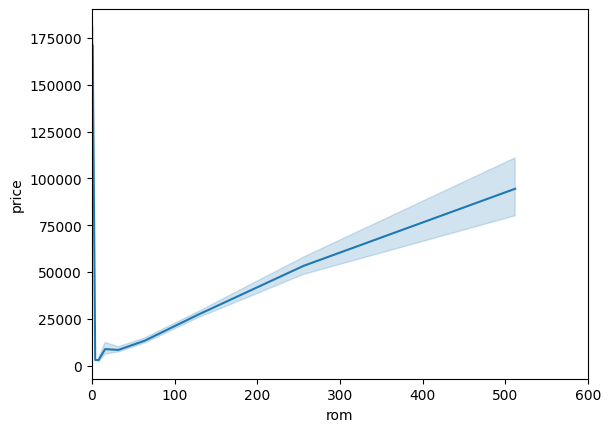

In [18]:
plot = sns.lineplot(x="rom",y="price",data=data)
plot.set_xlim(0,600)
plt.show()

**As the size of the internal storage increases price also increases.**

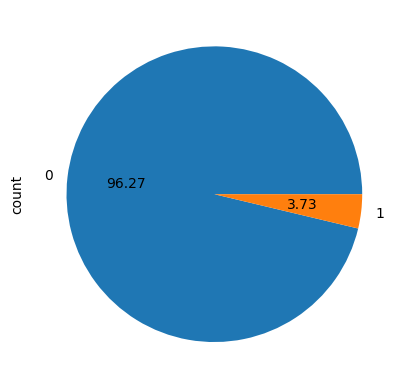

In [19]:
data['os'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

**Iphone verities are less compared to android phones in this dataset.**

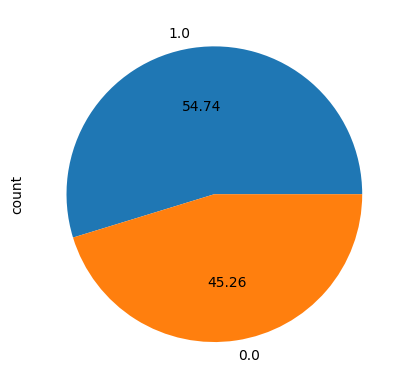

In [20]:
data['5g'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

**Half of the observations in the data have 5g**

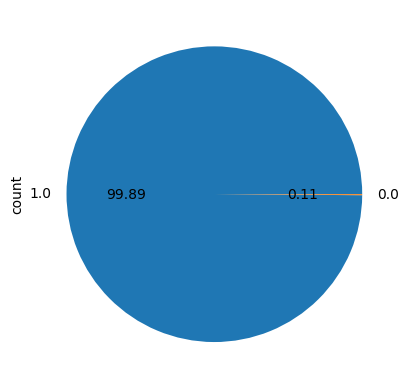

In [21]:
data['4g'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

**Most of the smartphones have 4g**

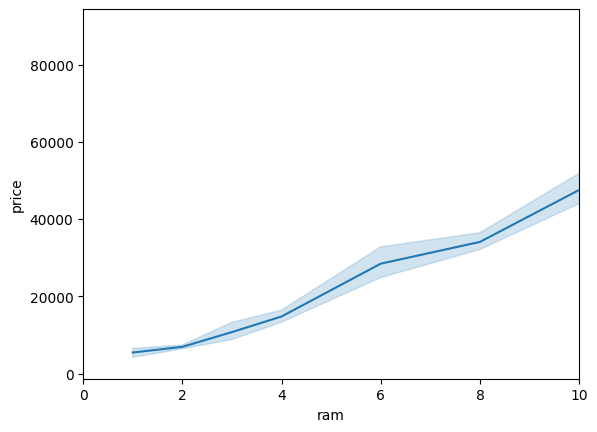

In [22]:
plot = sns.lineplot(x=data["ram"],y=data["price"])
plot.set_xlim(0,10)
plt.show()

**When the size of the ram increases price also increases**

## Train Test Split Data

In [23]:
y = data["price"]
data.drop(["price"],axis=1,inplace=True)
x = data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

## Model Initialization

In [24]:
lr = LinearRegression().fit(x_train,y_train)
rf = RandomForestRegressor(max_depth=10,n_estimators=100,random_state=1).fit(x_train,y_train)
dt = DecisionTreeRegressor().fit(x_train,y_train)

## Training And Testing

In [25]:
print("Linear Regression\n")
print("Training score: ", lr.score(x_train,y_train))
lr_pred = lr.predict(x_test)
print("Testing score: " , r2_score(y_test,lr_pred))

Linear Regression

Training score:  0.701065139742171
Testing score:  -39.26283868118925


In [26]:
print("Random Forest\n")
print("Training score: ", rf.score(x_train,y_train))
rf_pred = rf.predict(x_test)
print("Testing score: " , r2_score(y_test,rf_pred))

Random Forest

Training score:  0.9721126158373805
Testing score:  0.8658217900727673


In [27]:
print("Decision Tree\n")
print("Training score: ", dt.score(x_train,y_train))
dt_pred = dt.predict(x_test)
print("Testing Score: " , r2_score(y_test,dt_pred))

Decision Tree

Training score:  0.9981244520875332
Testing Score:  0.7909795540584875


## Testing With Single Unknown Data

In [28]:
# original price = 18490
a = [2,6.6,8,2.4,13,50,1,1,128,6,6000,0]
a = np.array(a)
a = np.expand_dims(a, 0)
print(round(rf.predict(a)[0],ndigits=2))

18546.76


**From above cell we can see that predictions made by random forest is the most accurate with unseen data**

## Testing With Cross Validation

In [29]:
new_rf = RandomForestRegressor(max_depth=10,n_estimators=100,random_state=1)
print("Random Forest",cross_val_score(new_rf,x,y,cv=10,scoring="r2",error_score="raise"))

Random Forest [ -2.77496431  -5.64774174 -21.84718695 -35.502978   -24.89174759
 -28.16772985 -39.50196207 -24.8186178   -9.92049769 -25.42001304]


## Pickling The Model

In [31]:
pickle.dump(rf,open("randomforest.p","wb"))
pickle.dump(lr,open("LinearRegression.p","wb"))
pickle.dump(dt,open("DecisionTree.p","wb"))